#1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
os.chdir('/gdrive/MyDrive')

In [ ]:
ls -l

total 129421
-rw------- 1 root root 77787439 Dec 12 09:07  books.csv
-rw------- 1 root root 11738238 Dec 12 09:07  jokes.csv
-rw------- 1 root root 30682276 Dec 12 09:07  ratings.csv
-rw------- 1 root root     9501 Dec 12 09:10 'RS_Internal_Lab_Question (1).ipynb'
-rw------- 1 root root    23483 Dec 12 10:12  RS_Internal_Lab_Question.ipynb
-rw------- 1 root root 12284157 Dec 12 09:07  users.csv


### Q1. Read the data (jokes.csv)

In [ ]:
jokes = pd.read_csv('jokes.csv')

In [ ]:
jokes.shape

(24983, 101)

In [ ]:
jokes.head()

NumJokes  Joke1  Joke2  Joke3  ...  Joke97  Joke98  Joke99  Joke100
0        74  -7.82   8.79  -9.66  ...   -5.63   99.00   99.00    99.00
1       100   4.08  -0.29   6.36  ...    3.06    0.34   -4.32     1.07
2        49  99.00  99.00  99.00  ...   99.00   99.00   99.00    99.00
3        48  99.00   8.35  99.00  ...   99.00   99.00   99.00    99.00
4        91   8.50   4.61  -4.17  ...    3.11    6.55    1.80     1.60

[5 rows x 101 columns]

### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [ ]:
ratings=jokes.iloc[:200,1:]

In [ ]:
ratings.head()

Joke1  Joke2  Joke3  Joke4  Joke5  ...  Joke96  Joke97  Joke98  Joke99  Joke100
0  -7.82   8.79  -9.66  -8.16  -7.52  ...   99.00   -5.63   99.00   99.00    99.00
1   4.08  -0.29   6.36   4.37  -2.38  ...   -2.14    3.06    0.34   -4.32     1.07
2  99.00  99.00  99.00  99.00   9.03  ...   99.00   99.00   99.00   99.00    99.00
3  99.00   8.35  99.00  99.00   1.80  ...   99.00   99.00   99.00   99.00    99.00
4   8.50   4.61  -4.17  -5.39   1.36  ...    1.55    3.11    6.55    1.80     1.60

[5 rows x 100 columns]

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [ ]:
ratings.isnull().any().sum()

0

In [ ]:
ratings=ratings.replace(99,0)

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [ ]:
ratings_mean=ratings.mean(axis=0)

In [ ]:
ratings_mean.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

### Q5. List most popular 10 jokes

In [ ]:
ratings_mean.sort_values(0,ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [ ]:
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [ ]:
print(books.columns)
print(ratings.columns)
print(users.columns)

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')
Index(['userID', 'ISBN', 'bookRating'], dtype='object')
Index(['userID', 'Location', 'Age'], dtype='object')


In [ ]:
books.drop(books.columns[-3:],axis=1,inplace=True)

In [ ]:
books.head()

ISBN  ...                   publisher
0  0195153448  ...     Oxford University Press
1  0002005018  ...       HarperFlamingo Canada
2  0060973129  ...             HarperPerennial
3  0374157065  ...        Farrar Straus Giroux
4  0393045218  ...  W. W. Norton &amp; Company

[5 rows x 5 columns]

# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [ ]:
ratings.head()

userID        ISBN  bookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6

In [ ]:
ratings_new=ratings[ratings.ISBN.isin(books.ISBN)]

In [ ]:
ratings_new=ratings_new[ratings_new.userID.isin(users.userID)]

In [ ]:
ratings_new.shape

(1031136, 3)

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [ ]:
ratings_new['bookRating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

In [ ]:
ratings_new=ratings_new[ratings_new["bookRating"] != 0]

In [ ]:
ratings_new.shape

(383842, 3)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


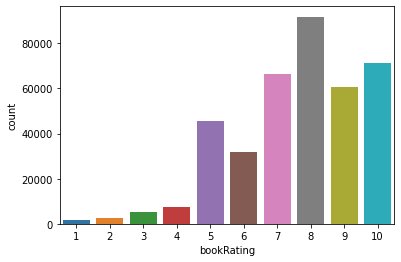

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(ratings_new['bookRating'])

In [ ]:
ratings_new['bookRating'].value_counts()

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [ ]:
counts1 = pd.value_counts(ratings_new['userID'])
ratings_new = ratings_new[ratings_new['userID'].isin(counts1[counts1 >= 100].index)]

In [ ]:
ratings_new.shape

(103271, 3)

In [ ]:
!pip install scikit-surprise

In [ ]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [ ]:
data = Dataset.load_from_df(ratings_new[['userID','ISBN','bookRating']], reader)
data.df.head(2)

userID        ISBN  bookRating
1456  277427  002542730X          10
1458  277427  003008685X           8

# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25, random_state=123)

In [ ]:
from surprise import SVD
from surprise import accuracy

In [ ]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [ ]:
test_pred = svd_model.test(testset)
accuracy.rmse(test_pred)

RMSE: 3.1156


3.115622999841449

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [ ]:
from collections import defaultdict

def get_top_n_user(predictions,user_ID,n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n[user_ID]

In [ ]:
get_top_n_user(test_pred,153662,15)

[('0345342968', 10),
 ('0380776839', 9.0451155447),
 ('0553575023', 8.991689180114081),
 ('0440214041', 8.991452338083848),
 ('0671034022', 8.786459557530634),
 ('0553210114', 8.726332301178896),
 ('0553213156', 8.497316459665988),
 ('0425176304', 8.279044737473862),
 ('0671744208', 8.198795524212214),
 ('0515114006', 8.136824946776054),
 ('0671525743', 8.129447138243505),
 ('0553295977', 8.113937607079684),
 ('0061083917', 8.091687586321271),
 ('0345334310', 8.041530256372805),
 ('0425189031', 8.022578793314283)]